In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set(style="darkgrid")

## ACYR 14-15

In [2]:
df14 = pd.read_excel('data/Apps_2014_15.xlsx', sheet_name='Admissions Tab - MASTER')
df14.head()

,ID,STATE,ADMIT_TYPE,ADMT_DESC,DECISION,APDC_DESC,COMP,APP_ENTRY_TERM,COLLEGE_CODE,DEGREE,...,ACT,HIGH_MATH,HIGH_VERBAL,HIGH_WRITING,TOTAL_SAT,PERCENTILE,CITZ_DESC,LGCY_DESC,ETHN_DESC,TESTOPT
0,135594,NY,FY,Freshman Applicant,A1,Admit,Y,201409,AS,BA,...,28.0,NaN,NaN,NaN,NaN,NaN,Citizen,NaN,"White,Including Spain/Portugal",N
1,136110,NY,FY,Freshman Applicant,A7,Deny,Y,201409,AS,BA,...,22.0,NaN,NaN,NaN,NaN,NaN,Citizen,NaN,"White,Including Spain/Portugal",N
2,136113,NY,FY,Freshman Applicant,A1,Admit,Y,201409,AS,BA,...,31.0,NaN,NaN,NaN,NaN,NaN,Citizen,NaN,"White,Including Spain/Portugal",N
3,135572,CT,FY,Freshman Applicant,NaN,NaN,N,201409,NS,BS,...,NaN,NaN,NaN,NaN,NaN,NaN,Permanent Resident Alien,NaN,Asian,N
4,135579,NaN,FY,Freshman Applicant,A2,Admit Withdraw,Y,201409,BU,BS,...,NaN,NaN,NaN,NaN,NaN,NaN,Foreign,NaN,International/No ethnicity,N


In [3]:
df14.columns, df14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9978 entries, 0 to 9977
Data columns (total 34 columns):
ID                9978 non-null int64
STATE             9706 non-null object
ADMIT_TYPE        9978 non-null object
ADMT_DESC         9978 non-null object
DECISION          9593 non-null object
APDC_DESC         9593 non-null object
COMP              9978 non-null object
APP_ENTRY_TERM    9978 non-null int64
COLLEGE_CODE      9977 non-null object
DEGREE            9977 non-null object
MAJOR             9977 non-null object
RESIDENT_CODE     9978 non-null object
ACCP              7137 non-null object
CONF              1056 non-null object
ENROLL            0 non-null float64
JESUIT            512 non-null object
HSCITY            9935 non-null object
HSSTATE           9707 non-null object
HSNATION          228 non-null object
GENDER            9978 non-null object
RELIGION          9166 non-null object
APPLIED           9978 non-null object
APPLIED_DATE      9978 non-null datetime6

(Index(['ID', 'STATE', 'ADMIT_TYPE', 'ADMT_DESC', 'DECISION', 'APDC_DESC',
        'COMP', 'APP_ENTRY_TERM', 'COLLEGE_CODE', 'DEGREE', 'MAJOR',
        'RESIDENT_CODE', 'ACCP', 'CONF', 'ENROLL', 'JESUIT', 'HSCITY',
        'HSSTATE', 'HSNATION', 'GENDER', 'RELIGION', 'APPLIED', 'APPLIED_DATE',
        'FIRSTGEN', 'ACT', 'HIGH_MATH', 'HIGH_VERBAL', 'HIGH_WRITING',
        'TOTAL_SAT', 'PERCENTILE', 'CITZ_DESC', 'LGCY_DESC', 'ETHN_DESC',
        'TESTOPT'],
       dtype='object'), None)

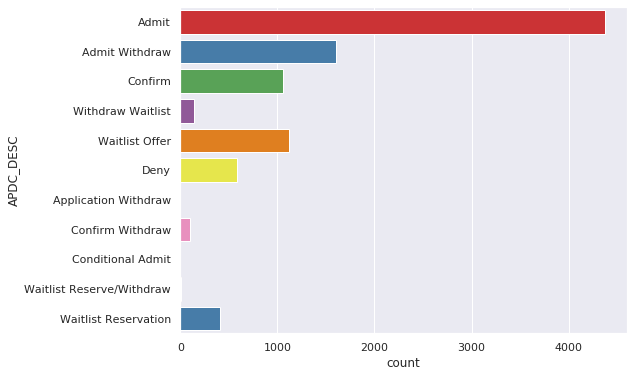

In [4]:
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(y="APDC_DESC", data=df14, palette='Set1',hue_order='APDC_DESC', 
                   order=['Admit','Admit Withdraw','Confirm','Withdraw Waitlist','Waitlist Offer','Deny','Application Withdraw',
                            'Confirm Withdraw','Conditional Admit','Waitlist Reserve/Withdraw','Waitlist Reservation'])

In [5]:
# do a bit of cleaning on the target for graphing purposes
df14['ACCP'].replace(to_replace=' ', value=np.nan, inplace=True)
df14['ACCP'].fillna('N', inplace=True)
df14['ACCP'].head()

0    Y
1    N
2    Y
3    N
4    Y
Name: ACCP, dtype: object

In [6]:
# some cleaning on target 2
df14['CONF'].replace(to_replace=' ', value='N', inplace=True)
df14['CONF'].fillna('N', inplace=True)
df14['CONF'].head()

0    N
1    N
2    N
3    N
4    N
Name: CONF, dtype: object

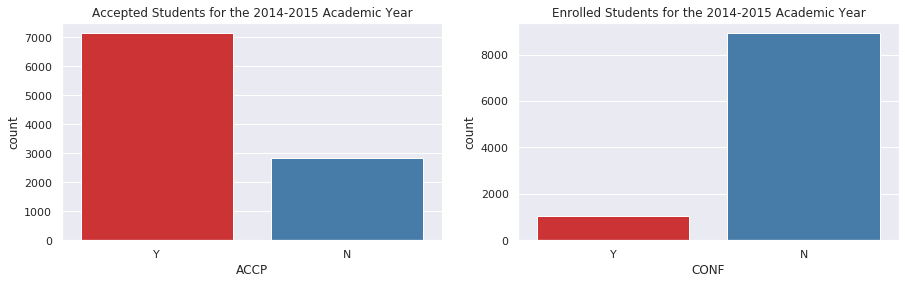

In [7]:
# graphs of the target 1 and target 3: Accepted and Enrolled 
fig = plt.figure(figsize=(15,4))
plt.tight_layout()

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1 = sns.countplot(x=df14['ACCP'], data=df14, palette='Set1', ax=ax1, order=['Y', 'N'])
ax2 = sns.countplot(x=df14['CONF'], data=df14, palette='Set1', ax=ax2, order=['Y', 'N'])

ax1.set_title('Accepted Students for the 2014-2015 Academic Year')
ax2.set_title('Enrolled Students for the 2014-2015 Academic Year')

plt.savefig('images/14_admit_enroll.png')

## ACYR 15-16

In [8]:
df15 = pd.read_excel('data/Apps_2015_16.xlsx', sheet_name='All Apps')
df15.head()

,ID,HSCity,HST,College,MAJR,1ST GEN,RGPA,Rating,P_M,Merit,...,Active Region,Active Postal,Active Country,Ethnicity,Test Optional,TSAT,VER,MAT,WRI,Legacy
0,154306,Hurley,NY,AS,BIOL,N,3.11,5.0,NaN,NaN,...,NY,12449-5010,United States,W,N,NaN,NaN,NaN,NaN,NaN
1,156038,Faisalabad,NaN,BU,INBU,Y,NaN,NaN,NaN,NaN,...,Punjab,38000,Pakistan,F,TOP,NaN,NaN,NaN,NaN,NaN
2,154625,Islamabad,NaN,EG,MEEN,Y,NaN,NaN,NaN,NaN,...,capital tertiorry,44000,Pakistan,F,TOP,NaN,NaN,NaN,NaN,NaN
3,148401,Manhasset,NY,AS,0000,N,3.67,4.0,NaN,LOY,...,NY,11563-1952,United States,U,TOP,NaN,NaN,NaN,NaN,N
4,149482,South Hamilton,MA,AS,0000,N,2.86,7.0,PLUS,NaN,...,MA,01982-2254,United States,W,N,1760.0,610.0,530.0,620.0,N


In [9]:
df15.columns, df15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10767 entries, 0 to 10766
Data columns (total 31 columns):
ID                10767 non-null int64
HSCity            10735 non-null object
HST               10520 non-null object
College           10767 non-null object
MAJR              10767 non-null object
1ST GEN           10763 non-null object
RGPA              10022 non-null float64
Rating            10157 non-null float64
P_M               5930 non-null object
Merit             6637 non-null object
DEC               10272 non-null object
APP_DESC          10272 non-null object
Accept            6928 non-null object
Enroll            966 non-null object
Citizen           10766 non-null object
Sex               10767 non-null object
RES               10766 non-null object
ACT               2534 non-null float64
Class Rank        2464 non-null float64
Class Size        2464 non-null float64
Active City       10765 non-null object
Active Region     10653 non-null object
Active Postal  

(Index(['ID', 'HSCity', 'HST', 'College', 'MAJR', '1ST GEN', 'RGPA', 'Rating',
        'P_M', 'Merit', 'DEC', 'APP_DESC', 'Accept', 'Enroll', 'Citizen', 'Sex',
        'RES', 'ACT', 'Class Rank', 'Class Size', 'Active City',
        'Active Region', 'Active Postal', 'Active Country', 'Ethnicity',
        'Test Optional', 'TSAT', 'VER', 'MAT', 'WRI', 'Legacy'],
       dtype='object'), None)

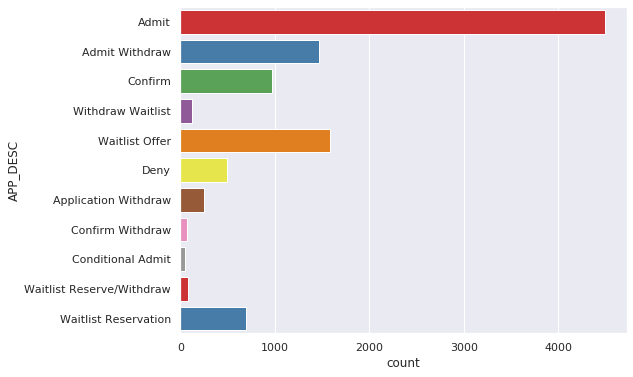

In [10]:
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(y="APP_DESC", data=df15, palette='Set1',hue_order='APP_DESC', 
                   order=['Admit','Admit Withdraw','Confirm','Withdraw Waitlist','Waitlist Offer','Deny','Application Withdraw',
                            'Confirm Withdraw','Conditional Admit','Waitlist Reserve/Withdraw','Waitlist Reservation'])

In [11]:
df15['Accept'].replace(to_replace=' ', value=np.nan, inplace=True)
df15['Accept'].fillna('N', inplace=True)
df15['Accept'].head()

0    N
1    N
2    N
3    Y
4    N
Name: Accept, dtype: object

In [12]:
df15['Enroll'].replace(to_replace=' ', value=np.nan, inplace=True)
df15['Enroll'].fillna('N', inplace=True)
df15['Enroll'].head()

0    N
1    N
2    N
3    N
4    N
Name: Enroll, dtype: object

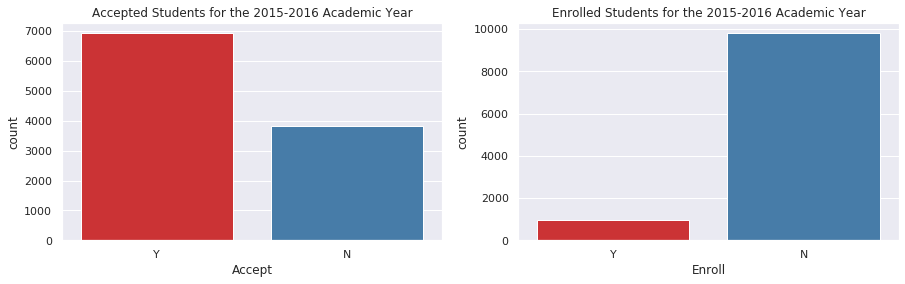

In [13]:
# graphs of the target 1 and target 3: Accepted and Enrolled 
fig = plt.figure(figsize=(15,4))
plt.tight_layout()

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1 = sns.countplot(x=df15['Accept'], data=df15, palette='Set1', ax=ax1, order=['Y', 'N'])
ax2 = sns.countplot(x=df15['Enroll'], data=df15, palette='Set1', ax=ax2, order=['Y', 'N'])

ax1.set_title('Accepted Students for the 2015-2016 Academic Year')
ax2.set_title('Enrolled Students for the 2015-2016 Academic Year')

plt.savefig('images/15_admit_enroll.png')

## ACYR 16-17

In [17]:
df16 = pd.read_excel('data/Apps_2016_17.xlsx', sheet_name='Full Population')
df16.head()

,ID,Accept,Enroll,HSCity,HST,College,MAJR,Major Description,1ST GEN,RGPA,...,Active Region,Active Postal,Active Country,Ethnicity,TOP,TSAT,VER,MAT,WRI,Legacy
0,173714,NaN,NaN,Wolcott,CT,BU,INBU,International Business,34,3.19,...,CT,06716-2306,United States,White,N,1600.0,550.0,470.0,580.0,B
1,170325,NaN,NaN,Chatham,NJ,AS,VPFT,"Film, Television and Media Arts",N,2.33,...,NJ,07928-1118,United States,White,N,NaN,NaN,NaN,NaN,NaN
2,171363,NaN,NaN,NORTHPORT,NY,AS,COMM,Communication,N,1.98,...,NY,11768-1939,United States,White,N,1680.0,580.0,520.0,580.0,NaN
3,174914,NaN,NaN,Guaynabo,PR,AS,MLLF,Modern Languages and Literatures - French,N,2.50,...,PR,00926-5545,United States,Hispanic,N,1500.0,560.0,400.0,540.0,NaN
4,175221,NaN,NaN,Bridgeport,CT,AS,BIOL,Biology,34,1.42,...,CT,06608-1046,United States,Hispanic,TOP,NaN,NaN,NaN,NaN,NaN


In [18]:
df16.columns, df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 35 columns):
ID                   11055 non-null int64
Accept               6795 non-null object
Enroll               1058 non-null object
HSCity               11034 non-null object
HST                  10781 non-null object
College              11055 non-null object
MAJR                 11055 non-null object
Major Description    11055 non-null object
1ST GEN              11054 non-null object
RGPA                 10195 non-null float64
Rating               10387 non-null float64
P_M                  6009 non-null object
Merit                6560 non-null object
DEC                  10532 non-null object
APP_DESC             10532 non-null object
ACCT                 6795 non-null object
CONF                 1058 non-null object
Citzen               11055 non-null object
Sex                  11055 non-null object
RES                  11055 non-null object
ACT                  2817 non-null f

(Index(['ID', 'Accept', 'Enroll', 'HSCity', 'HST', 'College', 'MAJR',
        'Major Description', '1ST GEN', 'RGPA', 'Rating', 'P_M', 'Merit', 'DEC',
        'APP_DESC', 'ACCT', 'CONF', 'Citzen', 'Sex', 'RES', 'ACT', 'Class Rank',
        'Class Size', 'Percentile', 'Active City', 'Active Region',
        'Active Postal', 'Active Country', 'Ethnicity', 'TOP', 'TSAT', 'VER',
        'MAT', 'WRI', 'Legacy'],
       dtype='object'), None)

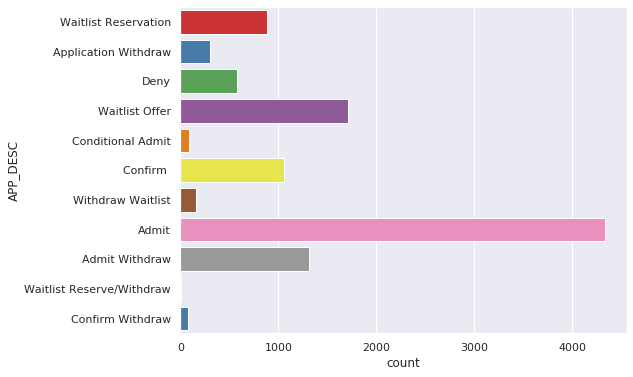

In [42]:
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(y="APP_DESC", data=df16, palette='Set1',hue_order='APP_DESC')
                  #order=['Admit','Admit Withdraw','Confirm','Withdraw Waitlist','Waitlist Offer','Deny','Application Withdraw',
                   #         'Confirm Withdraw','Conditional Admit','Waitlist Reserve/Withdraw','Waitlist Reservation'])  

In [20]:
df16['ACCT'].replace(to_replace=' ', value=np.nan, inplace=True)
df16['ACCT'].fillna('N', inplace=True)
df16['ACCT'].head()

0    N
1    N
2    N
3    N
4    N
Name: ACCT, dtype: object

In [21]:
df16['CONF'].replace(to_replace=' ', value='N', inplace=True)
df16['CONF'].fillna('N', inplace=True)
df16['CONF'].head()

0    N
1    N
2    N
3    N
4    N
Name: CONF, dtype: object

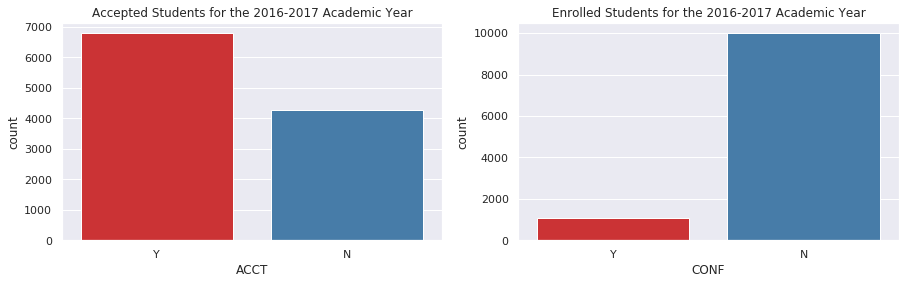

In [22]:
# graphs of the target 1 and target 3: Accepted and Enrolled 
fig = plt.figure(figsize=(15,4))
plt.tight_layout()

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1 = sns.countplot(x=df16['ACCT'], data=df16, palette='Set1', ax=ax1, order=['Y', 'N'])
ax2 = sns.countplot(x=df16['CONF'], data=df16, palette='Set1', ax=ax2, order=['Y', 'N'])

ax1.set_title('Accepted Students for the 2016-2017 Academic Year')
ax2.set_title('Enrolled Students for the 2016-2017 Academic Year')

plt.savefig('images/16_admit_enroll.png')

## ACYR 17-18

In [23]:
df17 = pd.read_excel('data/Apps_2017_18.xlsx', sheet_name='Initial Pop - TEST OPT')
df17.head()

,ID,Accept,Enroll,HSCity,HST,College,MAJR,Major Description,1ST GEN,RGPA,...,Total SAT,SAT VER OLD,SAT MATH OLD,SAT WRI OLD,Legacy,SAT Critical Reading - conversion,SAT Math - conversion,SAT CRITICAL READING NEW,SAT MATH NEW,SAT COMP NEW
0,194600,NaN,NaN,Bridgeport,CT,NS,NURS,Nursing,34,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,192063,A1,NaN,Southwick,MA,AS,BIOL,Biology,N,4.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,570.0,640.0,1210.0
2,196995,NaN,NaN,Bridgeport,CT,AS,HIST,History,N,1.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,630.0,610.0,1240.0
3,196162,NaN,NaN,Tolland,CT,EG,MEEN,Mechanical Engineering,N,1.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,540.0,540.0,1080.0
4,194619,NaN,NaN,Bridgeport,CT,NS,NURS,Nursing,N,0.61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df17.columns, df17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11218 entries, 0 to 11217
Data columns (total 40 columns):
ID                                   11218 non-null int64
Accept                               6794 non-null object
Enroll                               994 non-null object
HSCity                               11178 non-null object
HST                                  10898 non-null object
College                              11218 non-null object
MAJR                                 11218 non-null object
Major Description                    11218 non-null object
1ST GEN                              11218 non-null object
RGPA                                 10420 non-null float64
Rating                               10632 non-null float64
P_M                                  5465 non-null object
Merit                                6532 non-null object
DEC                                  10694 non-null object
APP_DESC                             10694 non-null object
ACCP      

(Index(['ID', 'Accept', 'Enroll', 'HSCity', 'HST', 'College', 'MAJR',
        'Major Description', '1ST GEN', 'RGPA', 'Rating', 'P_M', 'Merit', 'DEC',
        'APP_DESC', 'ACCP', 'CONF', 'Citizen', 'Sex', 'RES', 'Class Rank',
        'Class Size', 'Percentile', 'Active City', 'Active Region',
        'Active Postal', 'Active Country', 'Ethnicity', 'TOP', 'ACT',
        'Total SAT', 'SAT VER OLD', 'SAT MATH OLD', 'SAT WRI OLD', 'Legacy',
        'SAT Critical Reading - conversion', 'SAT Math - conversion',
        'SAT CRITICAL READING NEW', 'SAT MATH NEW', 'SAT COMP NEW'],
       dtype='object'), None)

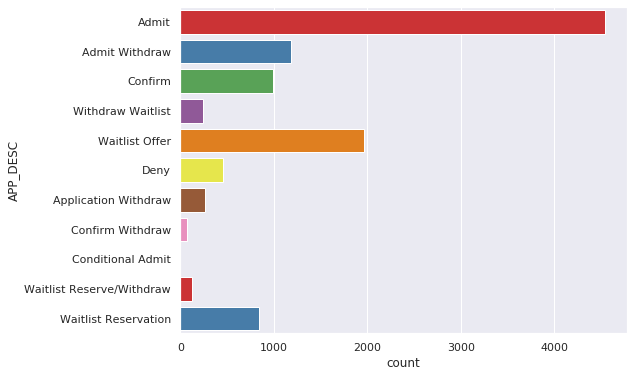

In [25]:
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(y="APP_DESC", data=df17, palette='Set1',hue_order='APP_DESC', 
                   order=['Admit','Admit Withdraw','Confirm','Withdraw Waitlist','Waitlist Offer','Deny','Application Withdraw',
                            'Confirm Withdraw','Conditional Admit','Waitlist Reserve/Withdraw','Waitlist Reservation'])

In [26]:
df17['ACCP'].replace(to_replace=' ', value=np.nan, inplace=True)
df17['ACCP'].fillna('N', inplace=True)
df17['ACCP'].head()

0    N
1    Y
2    N
3    N
4    N
Name: ACCP, dtype: object

In [27]:
df17['CONF'].replace(to_replace=' ', value='N', inplace=True)
df17['CONF'].fillna('N', inplace=True)
df17['CONF'].head(5)

0    N
1    N
2    N
3    N
4    N
Name: CONF, dtype: object

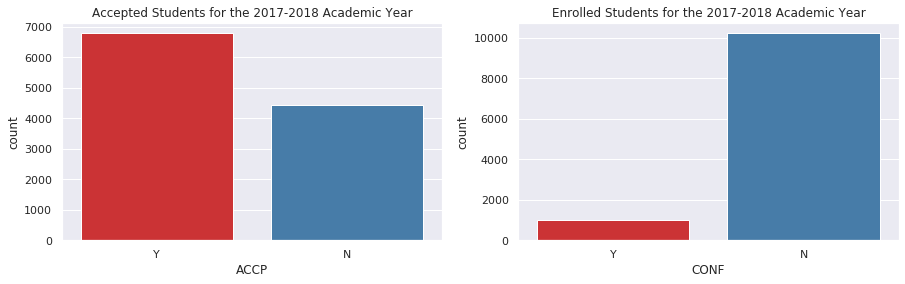

In [28]:
# graphs of the target 1 and target 3: Accepted and Enrolled 
fig = plt.figure(figsize=(15,4))
plt.tight_layout()

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1 = sns.countplot(x=df17['ACCP'], data=df17, palette='Set1', ax=ax1, order=['Y', 'N'])
ax2 = sns.countplot(x=df17['CONF'], data=df17, palette='Set1', ax=ax2, order=['Y', 'N'])

ax1.set_title('Accepted Students for the 2017-2018 Academic Year')
ax2.set_title('Enrolled Students for the 2017-2018 Academic Year')

plt.savefig('images/17_admit_enroll.png')

## ACYR 18-19

In [29]:
df18 = pd.read_excel('data/Apps_2018_19.xlsx', sheet_name='Apps')
df18.head()

,ID,Accept,HSCity,HST,College,MAJR,Major Description,1ST GEN,RGPA,Rating,...,TOP,Legacy,SAT Math OLD,SAT WRI OLD,SAT Verbal OLD,Total SAT OLD,ACT,SAT Reading NEW,SAT Math NEW,SAT Total NEW
0,214717,NaN,North Eastham,MA,Dolan School of Business,Business Undeclared,Business Undeclared,34,2.15,9.0,...,TOP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,214861,NaN,Bridgeport,CT,Dolan School of Business,Marketing,Marketing,34,2.52,9.0,...,N,NaN,NaN,NaN,NaN,NaN,NaN,440.0,450.0,890.0
2,211022,NaN,Newark,NJ,Dolan School of Business,Marketing,Marketing,N,1.24,9.0,...,N,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN
3,211015,NaN,New York,NY,College of Arts and Sciences,Undeclared,Undeclared,N,1.90,9.0,...,TOP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,204374,NaN,Danbury,CT,Dolan School of Business,Management,Management,34,NaN,NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df18.columns, df18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11361 entries, 0 to 11360
Data columns (total 37 columns):
ID                   11361 non-null int64
Accept               6851 non-null object
HSCity               11335 non-null object
HST                  11021 non-null object
College              11361 non-null object
MAJR                 11361 non-null object
Major Description    11293 non-null object
1ST GEN              11361 non-null object
RGPA                 10596 non-null float64
Rating               10840 non-null float64
P_M                  5571 non-null object
Merit                6694 non-null object
DEC                  10898 non-null object
APP_DESC             10898 non-null object
ACCP                 6851 non-null object
CONF                 1100 non-null object
Citizen              11361 non-null object
Sex                  11361 non-null object
RES                  11361 non-null object
Class Rank           1640 non-null float64
Class Size           1640 non-null 

(Index(['ID', 'Accept', 'HSCity', 'HST', 'College', 'MAJR', 'Major Description',
        '1ST GEN', 'RGPA', 'Rating', 'P_M', 'Merit', 'DEC', 'APP_DESC', 'ACCP',
        'CONF', 'Citizen', 'Sex', 'RES', 'Class Rank', 'Class Size',
        'Class Percentile', 'Active City', 'Active Region', 'Active Postal',
        'Active Country', 'Ethnicity', 'TOP', 'Legacy', 'SAT Math OLD',
        'SAT WRI OLD', 'SAT Verbal OLD', 'Total SAT OLD', 'ACT',
        'SAT Reading NEW', 'SAT Math NEW', 'SAT Total NEW'],
       dtype='object'), None)

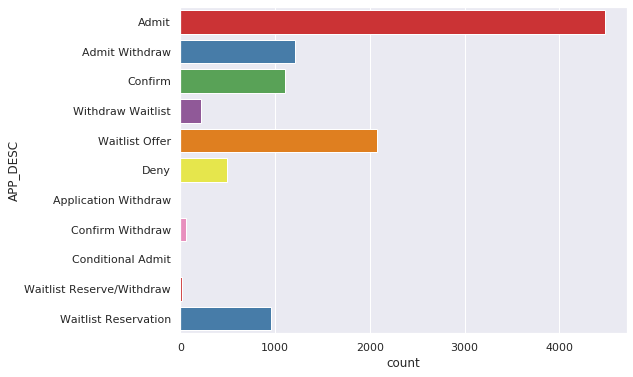

In [31]:
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(y="APP_DESC", data=df18, palette='Set1',hue_order='APP_DESC', 
                   order=['Admit','Admit Withdraw','Confirm','Withdraw Waitlist','Waitlist Offer','Deny','Application Withdraw',
                            'Confirm Withdraw','Conditional Admit','Waitlist Reserve/Withdraw','Waitlist Reservation'])

In [32]:
df18['ACCP'].replace(to_replace=' ', value=np.nan, inplace=True)
df18['ACCP'].fillna('N', inplace=True)
df18['ACCP'].head()

0    N
1    N
2    N
3    N
4    N
Name: ACCP, dtype: object

In [33]:
df18['CONF'].replace(to_replace=' ', value='N', inplace=True)
df18['CONF'].fillna('N', inplace=True)
df18['CONF'].head()

0    N
1    N
2    N
3    N
4    N
Name: CONF, dtype: object

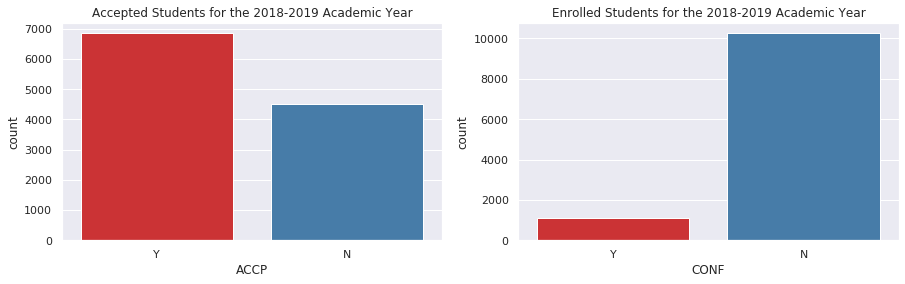

In [34]:
# graphs of the target 1 and target 2: Accepted and Enrolled 
fig = plt.figure(figsize=(15,4))
plt.tight_layout()

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1 = sns.countplot(x=df18['ACCP'], data=df18, palette='Set1', ax=ax1, order=['Y', 'N'])
ax2 = sns.countplot(x=df18['CONF'], data=df18, palette='Set1', ax=ax2, order=['Y', 'N'])

ax1.set_title('Accepted Students for the 2018-2019 Academic Year')
ax2.set_title('Enrolled Students for the 2018-2019 Academic Year')

plt.savefig('images/18_admit_enroll.png')

## Summary DF

In [35]:
df_sum = pd.read_excel('data/admission_summary.xlsx', index_col=0)
df_sum.head()

,Applications,Acceptances,Enrolls
Year,,,
2014,9978,7137,1056
2015,10767,6995,966
2016,11055,6795,1058
2017,11218,6794,994
2018,11361,6851,1091


In [36]:
df_sum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 2014 to 2018
Data columns (total 3 columns):
Applications    5 non-null int64
Acceptances     5 non-null int64
Enrolls         5 non-null int64
dtypes: int64(3)
memory usage: 160.0 bytes


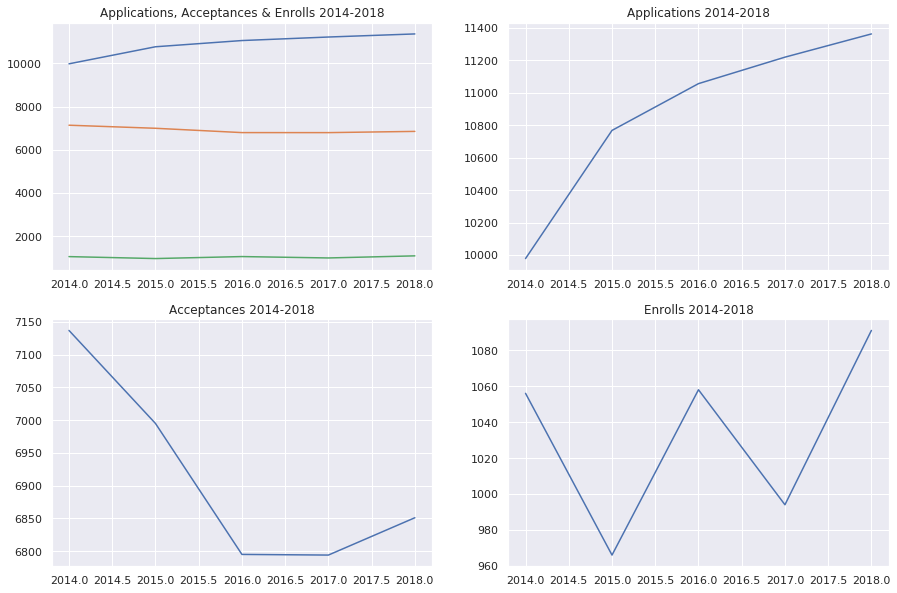

In [37]:
fig = plt.figure(figsize=(15,10))
plt.tight_layout()

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot(df_sum)
ax2.plot(df_sum['Applications'])
ax3.plot(df_sum['Acceptances'])
ax4.plot(df_sum['Enrolls'])

ax1.set_title('Applications, Acceptances & Enrolls 2014-2018')
ax2.set_title('Applications 2014-2018')
ax3.set_title('Acceptances 2014-2018')
ax4.set_title('Enrolls 2014-2018')

plt.savefig('images/apps_admits_enrolls_breakdown.png')

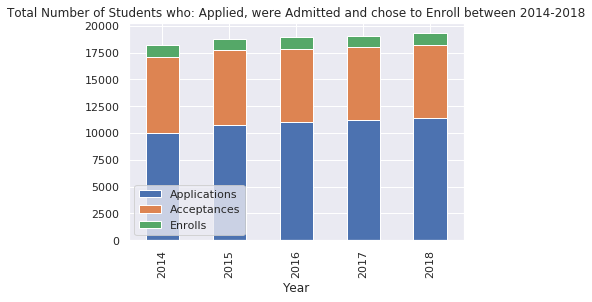

<Figure size 432x288 with 0 Axes>

In [38]:
# showing how applications, acceptances and enrolls compare to one another 
# don't think this is the best visualization
df_sum.plot(kind='bar', stacked=True)
plt.title('Total Number of Students who: Applied, were Admitted and chose to Enroll between 2014-2018')
plt.show()

plt.savefig('images/total_apps_admits_enrolls.png')